In [109]:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("28me-84fj",limit = 7266)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df
results_df1= pd.DataFrame.from_records(results)
results_df1

,org_level,city,area,district,sector,safety,s_race_african_american,s_race_asian_american,s_race_hispanic,s_race_white,...,t_respect_sex_female,t_respect_sex_male,t_respect_education_low,t_respect_education_medium,t_respect_education_high,t_respect_income_low,t_respect_income_medium,t_respect_income_high,start_date,end_date
0,Other,chicago,area_1,2,210,57.54,54.8,64.48,45.86,81.63,...,59.53,77.46,65.43,61.53,74.63,58.9,57.61,84.76,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
1,Other,chicago,area_1,2,220,54.89,50.43,64.57,50.86,75.33,...,53.33,65.35,64.08,55.66,60.26,52,60.27,69.43,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
2,Other,chicago,area_1,2,230,57.63,58.82,64.91,44,62.59,...,53.75,57.47,45.51,59.49,54.42,53.02,55.19,63.99,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
3,Other,chicago,area_1,2,NaN,56.69,54.68,64.65,46.9,73.18,...,55.54,66.76,58.34,58.89,63.1,54.64,57.69,72.73,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
4,Other,chicago,area_1,3,310,53.57,54.06,71.54,53.97,64.19,...,50.97,54.51,49.67,53.56,73.36,50.52,50.32,72.66,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,Other,chicago,area_5,25,2540,52.46,41.11,30.37,51.85,59.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000
7262,Other,chicago,area_5,25,2550,51.06,46.58,43.7,42.96,65.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000
7263,Other,chicago,area_5,25,NaN,54.3,44.58,37.04,51.49,64.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000
7264,Other,chicago,area_5,NaN,NaN,62.06,55.91,53.19,58.44,66.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000


In [110]:
results

results_df['Start_year'] = pd.to_datetime(results_df['start_date']).dt.year
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   org_level                        7266 non-null   object
 1   city                             7266 non-null   object
 2   area                             7044 non-null   object
 3   district                         6461 non-null   object
 4   sector                           4899 non-null   object
 5   safety                           7266 non-null   object
 6   s_race_african_american          7266 non-null   object
 7   s_race_asian_american            7266 non-null   object
 8   s_race_hispanic                  7266 non-null   object
 9   s_race_white                     7266 non-null   object
 10  s_race_other                     7266 non-null   object
 11  s_age_low                        7266 non-null   object
 12  s_age_medium                     7

In [167]:
# results_df.loc[:,'t_respect']
results_df['start_timestamp'] = pd.to_datetime(results_df['start_date'])
results_df['end_timpestamp'] = pd.to_datetime(results_df['end_date'])

results_df['start_Time'] = pd.to_datetime(results_df['start_date']).dt.time

results_df['end_date'] = pd.to_datetime(results_df['end_timpestamp']).dt.date
results_df['end_Time'] = pd.to_datetime(results_df['end_timpestamp']).dt.time
results_df


,org_level,city,area,district,sector,safety,s_race_african_american,s_race_asian_american,s_race_hispanic,s_race_white,...,start_date,end_timestamp,Start_year,start_timestamp,end_timestamp,start_Time,end_Time,s_race_asian_america,end_date,end_timpestamp
0,Other,chicago,NaN,2,210,57.54,54.80,64.48,45.86,81.63,...,2023-09-01,2023-09-30,2023,2023-09-01,2023-09-30,00:00:00,00:00:00,64.48,2023-09-30,2023-09-30
1,Other,chicago,NaN,2,220,54.89,50.43,64.57,50.86,75.33,...,2023-09-01,2023-09-30,2023,2023-09-01,2023-09-30,00:00:00,00:00:00,64.57,2023-09-30,2023-09-30
2,Other,chicago,NaN,2,230,57.63,58.82,64.91,44.00,62.59,...,2023-09-01,2023-09-30,2023,2023-09-01,2023-09-30,00:00:00,00:00:00,64.91,2023-09-30,2023-09-30
3,Other,chicago,NaN,2,NaN,56.69,54.68,64.65,46.90,73.18,...,2023-09-01,2023-09-30,2023,2023-09-01,2023-09-30,00:00:00,00:00:00,64.65,2023-09-30,2023-09-30
4,Other,chicago,NaN,3,310,53.57,54.06,71.54,53.97,64.19,...,2023-09-01,2023-09-30,2023,2023-09-01,2023-09-30,00:00:00,00:00:00,71.54,2023-09-30,2023-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,Other,chicago,NaN,25,2540,52.46,41.11,30.37,51.85,59.83,...,2017-11-01,2017-11-30,2017,2017-11-01,2017-11-30,00:00:00,00:00:00,30.37,2017-11-30,2017-11-30
7262,Other,chicago,NaN,25,2550,51.06,46.58,43.70,42.96,65.56,...,2017-11-01,2017-11-30,2017,2017-11-01,2017-11-30,00:00:00,00:00:00,43.70,2017-11-30,2017-11-30
7263,Other,chicago,NaN,25,NaN,54.30,44.58,37.04,51.49,64.11,...,2017-11-01,2017-11-30,2017,2017-11-01,2017-11-30,00:00:00,00:00:00,37.04,2017-11-30,2017-11-30
7264,Other,chicago,NaN,NaN,NaN,62.06,55.91,53.19,58.44,66.01,...,2017-11-01,2017-11-30,2017,2017-11-01,2017-11-30,00:00:00,00:00:00,53.19,2017-11-30,2017-11-30


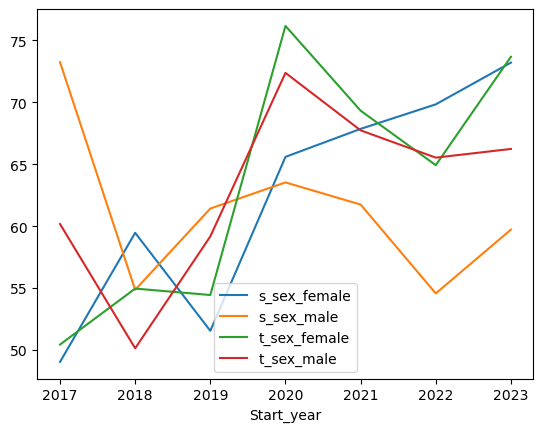

In [164]:
results_df["s_sex_female"] = pd.to_numeric(results_df.s_sex_female, errors='coerce')
results_df["s_sex_male"] = pd.to_numeric(results_df.s_sex_male, errors='coerce')

s = pd.DataFrame({
    's_sex_female'  : results_df["s_sex_female"],
    's_sex_male ': results_df['s_sex_male'],
        't_sex_female'  : results_df["t_sex_female"],
    't_sex_male ': results_df['t_sex_male'],
        }, index = results_df['Start_year'])
lines = s.plot.line()

#safelty score of male and female over the years
#trust scores of male and female over the years

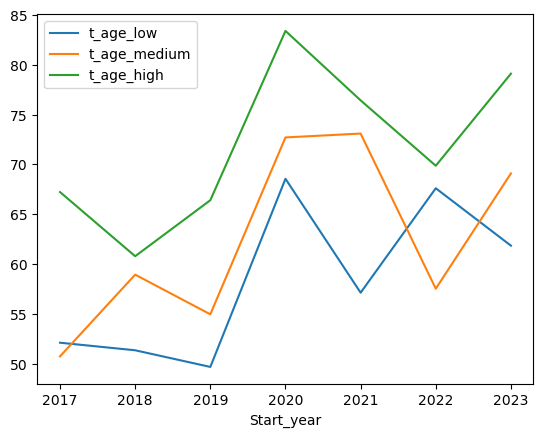

In [172]:
results_df["t_age_low"] = pd.to_numeric(results_df.t_age_low, errors='coerce')
results_df["t_age_medium"] = pd.to_numeric(results_df.t_age_medium, errors='coerce')
results_df["t_age_high"] = pd.to_numeric(results_df.t_age_high, errors='coerce')

s = pd.DataFrame({
    't_age_low'  : results_df["t_age_low"],
    't_age_medium': results_df['t_age_medium'],
    't_age_high'  : results_df["t_age_high"]
        }, index = results_df['Start_year'])
lines = s.plot.line()


#trust scores of people with different salary ranges over the years

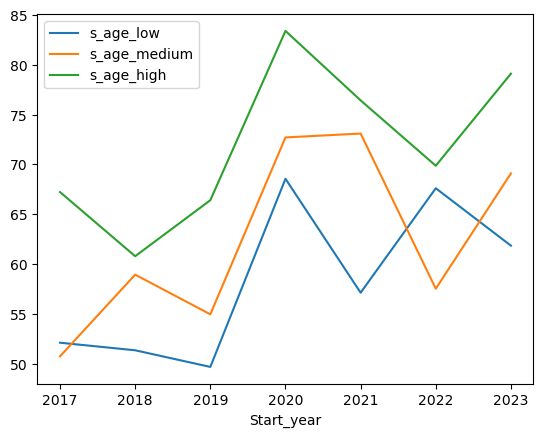

In [171]:
results_df["s_age_low"] = pd.to_numeric(results_df.s_age_low, errors='coerce')
results_df["s_age_medium"] = pd.to_numeric(results_df.s_age_medium, errors='coerce')
results_df["s_age_high"] = pd.to_numeric(results_df.s_age_high, errors='coerce')

s = pd.DataFrame({
    's_age_low'  : results_df["s_age_low"],
    's_age_medium': results_df['s_age_medium'],
    's_age_high'  : results_df["s_age_high"]
        }, index = results_df['Start_year'])
lines = s.plot.line()

# safety score of different income levels in the given years

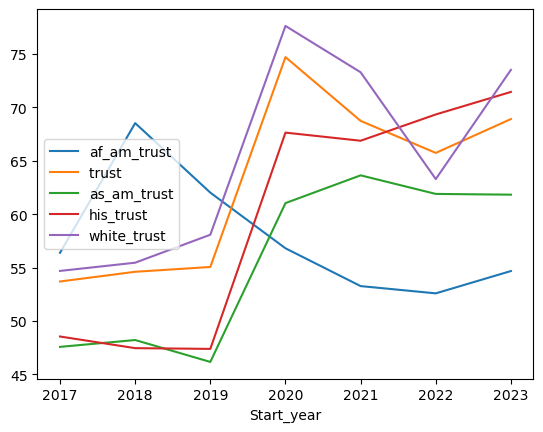

In [158]:
results_df["trust"] = pd.to_numeric(results_df.trust, errors='coerce')
results_df["t_race_african_american"] = pd.to_numeric(results_df.t_race_african_american, errors='coerce')
results_df["t_race_asian_american"] = pd.to_numeric(results_df.t_race_asian_american, errors='coerce')
results_df["t_race_hispanic"] = pd.to_numeric(results_df.t_race_hispanic, errors='coerce')
results_df["t_race_white"] = pd.to_numeric(results_df.t_race_white, errors='coerce')

# t_race_white
s = pd.DataFrame({
    'af_am_trust'  : results_df["t_race_african_american"],
    'trust ': results_df['trust'],
    'as_am_trust' : results_df["t_race_asian_american"],
    'his_trust' : results_df["t_race_hispanic"],
    'white_trust': results_df["t_race_white"]
        }, index = results_df['Start_year'])#index=[2017, 2018,2019,2020,2021,2022,2023])
lines = s.plot.line()

#trust score of african american people, hispanix, whites, asian american over the years

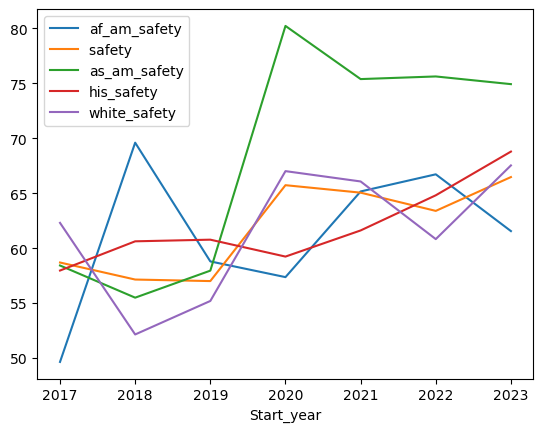

In [159]:
results_df["safety"] = pd.to_numeric(results_df.safety, errors='coerce')
results_df["s_race_african_american"] = pd.to_numeric(results_df.s_race_african_american, errors='coerce')
results_df["s_race_asian_american"] = pd.to_numeric(results_df.s_race_asian_american, errors='coerce')
results_df["s_race_hispanic"] = pd.to_numeric(results_df.s_race_hispanic, errors='coerce')
results_df["s_race_white"] = pd.to_numeric(results_df.s_race_white, errors='coerce')

# t_race_white
s = pd.DataFrame({
    'af_am_safety'  : results_df["s_race_african_american"],
    'safety ': results_df['safety'],
    'as_am_safety' : results_df["s_race_asian_american"],
    'his_safety' : results_df["s_race_hispanic"],
    'white_safety': results_df["s_race_white"]
        }, index = results_df['Start_year'])
lines = s.plot.line()

# safety scores of african american, asian american, whites, hispanic over the years

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np

# results_df["s_race_asian_america"] = pd.to_numeric(results_df.s_race_asian_american, errors='coerce')
# #species = ("Adelie", "Chinstrap", "Gentoo")
# penguin_means = {
#     'overall_safety': results_df['safety'] , 
# 	'af_am_saftey': results_df['s_race_african_american'],
#     'as_am_safety' : results_df['s_race_asian_american'],
# }

# x = np.arange(len(results_df['Start_year']))  # the label locations
# width = 0.25  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

# for attribute, measurement in penguin_means.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Length (mm)')
# ax.set_title('Penguin attributes by species')
# ax.set_xticks(x + width, results_df['Start_year'])
# ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)

# plt.show()